In [1]:

import pandas as pd
import os
from dbfread import DBF
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
#Importo los datos

data_general = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_100_DISCAPACIDAD.dbf', load=True, encoding='latin-1'))
data_discaapacidad = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_200_DISCAPACIDAD.dbf', load=True, encoding='latin-1'))
data_vivienda = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_300_HOGAR Y VIVIENDA.dbf', load=True, encoding='latin-1'))
data_educacion = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_500_EDUCACION.dbf', load=True, encoding='latin-1'))
data_salud = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_600_SALUD.dbf', load=True, encoding='latin-1'))
data_empleo1 = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_700_EMPLEO_1.dbf', load=True, encoding='latin-1'))
data_empleo2 = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_700_EMPLEO_2.dbf', load=True, encoding='latin-1'))
data_accesibilidad = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_800_ACCESIBILIDAD.dbf', load=True, encoding='latin-1'))
data_integracion = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_900_INTEGRACION.dbf', load=True, encoding='latin-1'))

In [3]:
data_empleo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37524 entries, 0 to 37523
Columns: 238 entries, NOMBREDD to AREA
dtypes: float64(172), int64(17), object(49)
memory usage: 68.1+ MB


In [3]:
nombre_general = {
    'NOMBREDD':'departamento', 
    'P01':'codigodepar', 
    'P06':'conglomerado', 
    'P11':'nºvivienda', 
    'P14':'nºhogar', 
    'P13':'cuantoshogares', 
    'P101':'orden', 
    'P103':'parentesco', 
    'P104':'esmiembro',
    'P105':'sexo',
    'P106':'edad', 
    'P106_1':'meses', 
    'P107':'dni', 
    'P108':'estadocivil', 
    'P109_1':'estudio', 
    'REG_NAT':'region', 
    'AREA':'area', 
    'FACTOR_PCD':'factorpoblacion', 
    'METROP': 'metrop'
}
'codigodepar','nºvivienda','factorpoblacion', 'metrop','cuantoshogares','nºhogar','esmiembro'




('codigodepar',
 'nºvivienda',
 'factorpoblacion',
 'metrop',
 'cuantoshogares',
 'nºhogar',
 'esmiembro')

In [4]:
data_general.rename(columns=nombre_general,inplace=True)
data_discaapacidad.rename(columns=nombre_general,inplace=True)
data_vivienda.rename(columns=nombre_general,inplace=True)
data_educacion.rename(columns=nombre_general,inplace=True)
data_salud.rename(columns=nombre_general,inplace=True)
data_empleo1.rename(columns=nombre_general,inplace=True)
data_empleo2.rename(columns=nombre_general,inplace=True)
data_accesibilidad.rename(columns=nombre_general,inplace=True)
data_integracion.rename(columns=nombre_general,inplace=True)

In [5]:
nombre_discapacidad = {
    'P203':'movilidad',
    'P204':'vision',
    'P205':'comunicacion',
    'P206':'audicion',
    'P207':'cognitivo',
    'P208':'social',
    'P209':'cronico'
}

data_discaapacidad.rename(columns=nombre_discapacidad,inplace=True)

In [6]:
nombre_accesibilidad = {
    'P802_01':'salud',
    'P802_02':'educativo',
    'P802_04':'farmacia',
    'P802_05':'spub',
    'P802_11':'mercado',
    'P802_12':'super',
    'P805_01':'rampa',
    'P805_04':'calledespejada',
    'P806_01':'transportepublicod',
    'P806_09':'aereo',
    'P808':'estadovias'    
}

data_accesibilidad.rename(columns=nombre_accesibilidad,inplace=True)

In [7]:
nombre_accesibilidad1 = {
    'P802_01':'salud',
    'P802_02':'educativo',
    'P802_04':'farmacia',
    'P802_05':'spub',
    'P802_11':'mercado',
    'P802_12':'super',
    'P806_01':'transportepublicod',
    'P806_09':'aereo',
    'P808':'estadovias'    
}

data_integracion.rename(columns=nombre_accesibilidad1,inplace=True)

In [8]:
nombre_educacion = {
    'P501':'lee', 
    'P502':'asisteestablecimiento', 
    'P509':'xqno', 
    'P521':'dni',
    'P523':'etnia' 
}
data_educacion.rename(columns=nombre_educacion,inplace=True)

In [9]:
nombre_salud = {
    'P601_3':'sintonmacronico',
    'P601_4':'accidente',
    'P621':'hijos',
    'P619':'segurodesalud',
    'P606':'presenciasintomadisc'
}
data_salud.rename(columns=nombre_salud,inplace=True)

In [10]:
nombre_integracion = {
    'P901':'tratodist',
    'P905':'relacionsentimentalpas',
    'P911':'voto',
    'P921_2':'impdesarrollopersonal',
    'P921_3':'valoracosas'
}
data_integracion.rename(columns=nombre_integracion,inplace=True)

In [11]:
data_empleo1 = data_empleo1.replace('', np.nan)

nombre_empleo = {
    'P735':'quieretrabajar',
    'P744':'discpentrabajo',
    'P734':'quehizosempas',
    'P701':'trabajoultsemana',
    'P702':'volvera',
    'P702':'negocio',
    'P705_1':'trabajoprincipal'
}
data_empleo1.rename(columns=nombre_empleo,inplace=True)

In [17]:
list(nombre_empleo.values())

['quieretrabajar',
 'discpentrabajo',
 'quehizosempas',
 'trabajoultsemana',
 'negocio',
 'trabajoprincipal']

In [12]:
dataset = pd.concat([
    data_general[list(nombre_general.values())], 
    data_empleo1[list(nombre_empleo.values())], 
    data_integracion[list(nombre_integracion.values())],
    data_salud[list(nombre_salud.values())], 
    data_educacion[list(nombre_educacion.values())], 
    data_accesibilidad[list(nombre_accesibilidad1.values())],
    data_discaapacidad[list(nombre_discapacidad.values())]  
], axis=1)

In [17]:
dataset.columns

Index(['departamento', 'codigodepar', 'conglomerado', 'nºvivienda', 'nºhogar',
       'cuantoshogares', 'orden', 'parentesco', 'esmiembro', 'sexo', 'edad',
       'meses', 'dni', 'estadocivil', 'estudio', 'region', 'area',
       'factorpoblacion', 'metrop', 'quieretrabajar', 'discpentrabajo',
       'quehizosempas', 'trabajoultsemana', 'negocio', 'trabajoprincipal',
       'tratodist', 'relacionsentimentalpas', 'voto', 'impdesarrollopersonal',
       'valoracosas', 'sintonmacronico', 'accidente', 'hijos', 'segurodesalud',
       'presenciasintomadisc', 'lee', 'asisteestablecimiento', 'xqno', 'dni',
       'etnia', 'salud', 'educativo', 'farmacia', 'spub', 'mercado', 'super',
       'transportepublicod', 'aereo', 'estadovias', 'movilidad', 'vision',
       'comunicacion', 'audicion', 'cognitivo', 'social', 'cronico'],
      dtype='object')

In [13]:
tirar = ['codigodepar','meses','metrop','trabajoprincipal','dni','cuantoshogares','orden','esmiembro','factorpoblacion','nºvivienda','nºhogar','trabajoprincipal'] 
dataset.drop(columns=tirar, inplace=True)

In [14]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

In [15]:
dataset.loc[dataset['edad'] < 12, 'estadocivil'] = 0

In [16]:
dataset.loc[dataset['edad'] < 5, 'estudio'] = 1

In [17]:
dataset.loc[dataset['edad'] < 5, 'lee'] = 2

In [18]:
dataset.loc[dataset['edad'] < 5, 'xqno'] = 0

In [19]:
nanlee = dataset[dataset['lee'].isna()]['edad'].value_counts()

In [20]:
premedios = dataset.groupby('edad')['lee'].mean()

In [21]:
premedios = dataset.groupby('edad')['lee'].mean()

# Calculamos la probabilidad de ser '2' para cada edad
# Si el promedio es 1.7, prob_de_ser_2 es 0.7
prob_de_ser_2 = premedios - 1

# --- 2. Mapear la probabilidad a CADA fila ---

# Creamos una columna temporal.
# .map() asigna a cada fila la probabilidad que le corresponde
# según su 'edad'.
dataset['temp_prob'] = dataset['edad'].map(prob_de_ser_2)

# --- 3. Generar valores aleatorios (Vectorizado) ---

# Identificamos las filas que vamos a rellenar (donde 'lee' es NaN)
filas_nan = dataset['lee'].isna()

# Contamos cuántas son
n_nans = filas_nan.sum()

# Obtenemos las probabilidades específicas para esas filas NaN
probabilidades_nan = dataset.loc[filas_nan, 'temp_prob']

# Generamos un número aleatorio (entre 0 y 1) para CADA NaN
aleatorios = np.random.rand(n_nans)

# --- 4. Comparar y crear los nuevos valores ---

# Comparamos: Si el aleatorio < probabilidad, le asignamos 2. Si no, 1.
# (Ej: si prob=0.7 y aleatorio=0.6, se vuelve 2. Si aleatorio=0.8, se vuelve 1)
nuevos_valores = np.where(aleatorios < probabilidades_nan, 2, 1)

# --- 5. Rellenar los NaN ---

# Asignamos los nuevos valores SOLAMENTE a las filas que eran NaN
dataset.loc[filas_nan, 'lee'] = nuevos_valores

# --- 6. Limpiar ---
dataset.drop(columns='temp_prob', inplace=True)

In [100]:
dataset[dataset['farmacia'].isna()]['departamento'].value_counts()

departamento
LIMA             254
CALLAO            81
UCAYALI           69
ANCASH            68
AMAZONAS          60
PUNO              59
JUNIN             52
AYACUCHO          45
APURIMAC          44
CAJAMARCA         43
HUANCAVELICA      43
AREQUIPA          40
HUANUCO           39
LAMBAYEQUE        33
SAN MARTIN        29
PIURA             27
CUSCO             26
PASCO             24
ICA               22
LORETO            19
LA LIBERTAD       18
MOQUEGUA          18
TACNA             17
TUMBES            15
MADRE DE DIOS     13
Name: count, dtype: int64

In [22]:
dataset.loc[dataset['edad'] < 14, 'quieretrabajar'] = 0

dataset['quieretrabajar'] = pd.to_numeric(dataset['quieretrabajar'], errors='coerce')

In [23]:
dataset.loc[dataset['edad'] < 14, 'discpentrabajo'] = 0

dataset['discpentrabajo'] = pd.to_numeric(dataset['discpentrabajo'], errors='coerce')

In [24]:
lista_empleo_filtrar = list(nombre_empleo.values())
dataset.loc[dataset['edad'] < 14, lista_empleo_filtrar] = 0

for columna in lista_empleo_filtrar:
    dataset[columna] = pd.to_numeric(dataset[columna], errors='coerce')

dataset['estudio'] = pd.to_numeric(dataset['estudio'], errors='coerce')

In [25]:
dataset.loc[dataset['edad'] < 18, 'voto'] = 0

In [26]:
dataset.loc[dataset['edad'] < 12, 'hijos'] = 2


In [27]:
dataset.loc[dataset['edad'] < 12, 'relacionsentimentalpas'] = 0


In [28]:
dataset.loc[dataset['edad'] < 12, 'etnia'] = 0

In [32]:
dataset.drop(columns = 'trabajoprincipal',inplace= True)

In [41]:
dataset_limpio = dataset.dropna()

In [42]:
variablesdummy = ['departamento', 'parentesco', 'sexo',
       'estadocivil', 'estudio', 'region', 'area', 'quieretrabajar',
       'discpentrabajo', 'quehizosempas', 'trabajoultsemana', 'negocio',
       'tratodist', 'relacionsentimentalpas', 'voto', 'impdesarrollopersonal',
       'valoracosas', 'sintonmacronico', 'accidente', 'hijos', 'segurodesalud',
       'presenciasintomadisc', 'lee', 'asisteestablecimiento', 'xqno', 'etnia',
       'educativo', 'farmacia', 'spub', 'mercado', 'super',
       'aereo', 'estadovias', 'movilidad', 'vision', 'comunicacion',
       'audicion', 'cognitivo', 'social', 'cronico']


dummies = pd.get_dummies(
    dataset_limpio,
    columns=variablesdummy,
    drop_first=True,    # poné False si querés todas las categorías
    dummy_na=False,     # poné True si querés una columna para NaN
    dtype="uint8"
)

dataset_limpio = dummies

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y = dataset_limpio['impdesarrollopersonal_2']
X = dataset_limpio.drop('impdesarrollopersonal_2', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1. Crear el escalador
scaler_edad = StandardScaler()

# 2. Hacer copias de tus DataFrames para evitar el "SettingWithCopyWarning"
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# 3. Ajustar y transformar (fit_transform) SOLO en 'edad' de ENTRENAMIENTO
# El escalador "aprende" la media y la desv. estándar de X_train
X_train_scaled['edad'] = scaler_edad.fit_transform(X_train[['edad']])

# 4. Aplicar (transform) SOLAMENTE en 'edad' de PRUEBA
# Aquí solo "transforma" usando la media y desv. que aprendió de X_train
# ¡¡No se usa .fit()!!
X_test_scaled['edad'] = scaler_edad.transform(X_test[['edad']])

Iniciando búsqueda de hiperparámetros para KNN...
Búsqueda finalizada.
Mejores parámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Mejor score (accuracy) en CV: 0.7339
Score AUC (KNN) en Test: 0.8076


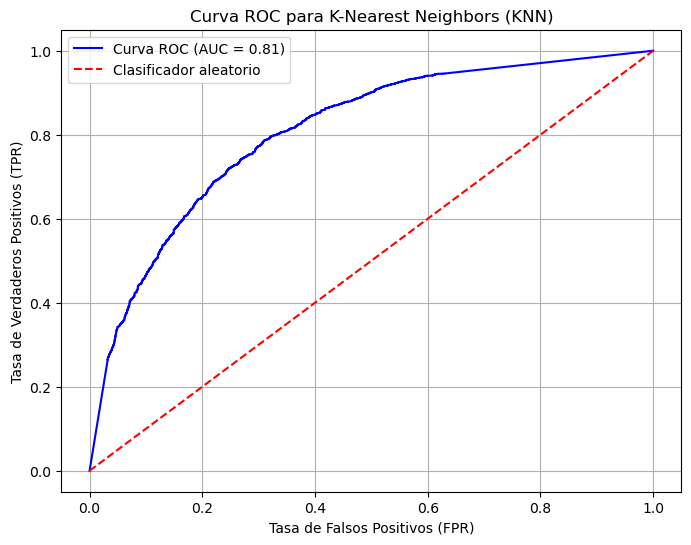

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
knn = KNeighborsClassifier()

# b. Definir la grilla de hiperparámetros de KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15],  # El valor de K
    'weights': ['uniform', 'distance'], # Cómo pesan los vecinos
    'metric': ['euclidean', 'manhattan'] # Tipo de distancia
}

# c. Configurar la búsqueda en grilla
# Usamos n_jobs=-1 para que use todos los procesadores (más rápido)
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# d. Ejecutar la búsqueda (¡Usando los datos escalados!)
print("Iniciando búsqueda de hiperparámetros para KNN...")
grid_search_knn.fit(X_train_scaled, y_train)

# --- 2. MOSTRAR MEJORES RESULTADOS ---
print("Búsqueda finalizada.")
print(f"Mejores parámetros para KNN: {grid_search_knn.best_params_}")
print(f"Mejor score (accuracy) en CV: {grid_search_knn.best_score_:.4f}")

# --- 3. OBTENER PREDICCIONES Y GRAFICAR ROC ---

# a. Obtener el mejor modelo (ya entrenado)
best_model = grid_search_knn.best_estimator_

# b. Obtener las probabilidades sobre el set de PRUEBA (escalado)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# c. Calcular el score AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC (KNN) en Test: {auc_score:.4f}")

# d. Calcular los puntos de la curva (FPR, TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# e. Graficar 📈
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para K-Nearest Neighbors (KNN)')
plt.legend()
plt.grid()
plt.show()

In [49]:
model = LogisticRegression()

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# 5. Realizar Predicciones
# Usamos el modelo entrenado para predecir los resultados en el conjunto de prueba
y_pred = model.predict(X_test)

# 6. Evaluar el Modelo
# Comparamos las predicciones (y_pred) con los valores reales (y_test)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("-" * 30)

# Matriz de Confusión
# Muestra cuántos clasificó bien y cuántos mal
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("-" * 30)

Exactitud del modelo: 75.81%
------------------------------
Matriz de Confusión:
[[2376  529]
 [ 751 1635]]
------------------------------


c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
log_reg = LogisticRegression(solver='liblinear') 

# 2. Define la grilla de hiperparámetros
# Queremos probar todos estos valores de C combinados con ambas penalizaciones
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Lista de valores de C a probar
    'penalty': ['l1', 'l2']         # Lista de penalizaciones a probar
}

# 3. Configura la búsqueda en grilla
# cv=5 significa que usará validación cruzada de 5 folds
# scoring='accuracy' (o 'roc_auc', etc.) le dice qué métrica optimizar
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# 4. Ejecuta la búsqueda
# Esto entrenará todos los modelos para cada combinación
grid_search.fit(X_train, y_train)

# 5. Muestra los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# 6. Muestra el mejor score
print(f"Mejor score (accuracy): {grid_search.best_score_}")

Mejores parámetros: {'C': 0.1, 'penalty': 'l1'}
Mejor score (accuracy): 0.8076954232482786


Score AUC: 0.8514


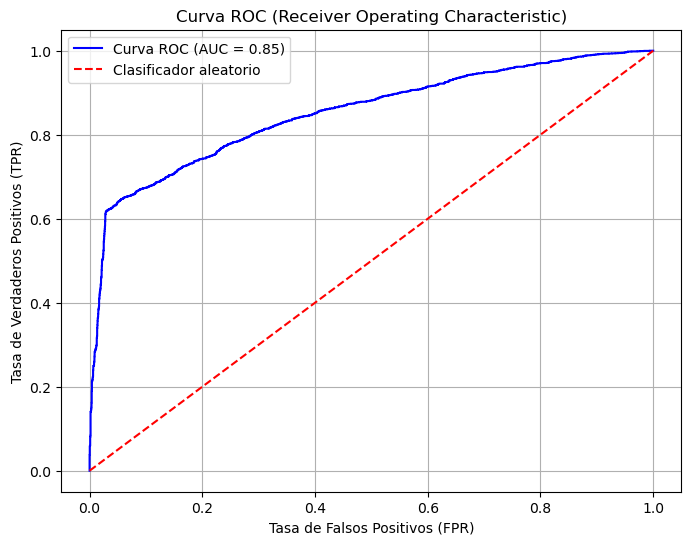

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_

# b. Obtener las PROBABILIDADES de predicción sobre el set de PRUEBA
# .predict_proba() devuelve 2 columnas (prob de clase 0, prob de clase 1)
# Necesitamos la probabilidad de la clase positiva [:, 1]
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# --- 4. CALCULAR Y GRAFICAR LA CURVA ROC (Paso nuevo) 📈 ---

# a. Calcular el score AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC: {auc_score:.4f}")

# b. Calcular los puntos de la curva (FPR, TPR)
# fpr = False Positive Rate (Tasa de Falsos Positivos)
# tpr = True Positive Rate (Tasa de Verdaderos Positivos)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# c. Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio') # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.grid()
plt.show()